##Part 1: CIFAR10 Classification

Follow along the tutorial for CIFAR10 classification found here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.

In [ ]:
# Load the CIFAR10 data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


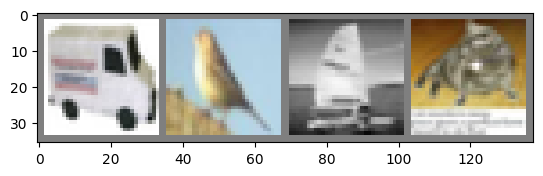

truck bird  ship  cat  


In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
num_rows = len(next(iter(trainloader)))
num_cols = max([len(row) for row in next(iter(trainloader))])
print((num_rows, num_cols))  

(2, 4)


In [ ]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Add code here
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Add code here
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 3

# Train the network
for epoch in range(num_epochs):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item() 
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            # Add code here
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.877
[1,  6000] loss: 1.675
[1,  8000] loss: 1.576
[1, 10000] loss: 1.498
[1, 12000] loss: 1.454
[2,  2000] loss: 1.388
[2,  4000] loss: 1.334
[2,  6000] loss: 1.316
[2,  8000] loss: 1.286
[2, 10000] loss: 1.297
[2, 12000] loss: 1.263
[3,  2000] loss: 1.187
[3,  4000] loss: 1.178
[3,  6000] loss: 1.168
[3,  8000] loss: 1.170
[3, 10000] loss: 1.157
[3, 12000] loss: 1.128
Finished Training


In [ ]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        # Add code here...
        images, labels = data

        # Calculate outputs by running images through the network
        outputs = net(images)

        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10

# Train the network
for epoch in range(num_epochs):  # Loop over the dataset multiple times

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
      # Get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # Print statistics
      running_loss += loss.item() 
      if i % 2000 == 1999:    # Print every 2000 mini-batches
          # Add code here
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0
        
  # Test the network
  correct = 0
  total = 0
  # Since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          # Add code here...
          images, labels = data

          # Calculate outputs by running images through the network
          outputs = net(images)

          # The class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Epoch:{epoch + 1}, Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.124
[1,  4000] loss: 1.786
[1,  6000] loss: 1.609
[1,  8000] loss: 1.550
[1, 10000] loss: 1.528
[1, 12000] loss: 1.463
Epoch:1, Accuracy of the network on the 10000 test images: 47 %
[2,  2000] loss: 1.397
[2,  4000] loss: 1.384
[2,  6000] loss: 1.364
[2,  8000] loss: 1.346
[2, 10000] loss: 1.320
[2, 12000] loss: 1.274
Epoch:2, Accuracy of the network on the 10000 test images: 53 %
[3,  2000] loss: 1.212
[3,  4000] loss: 1.233
[3,  6000] loss: 1.198
[3,  8000] loss: 1.206
[3, 10000] loss: 1.194
[3, 12000] loss: 1.198
Epoch:3, Accuracy of the network on the 10000 test images: 57 %
[4,  2000] loss: 1.104
[4,  4000] loss: 1.123
[4,  6000] loss: 1.110
[4,  8000] loss: 1.130
[4, 10000] loss: 1.139
[4, 12000] loss: 1.119
Epoch:4, Accuracy of the network on the 10000 test images: 59 %
[5,  2000] loss: 1.048
[5,  4000] loss: 1.043
[5,  6000] loss: 1.054
[5,  8000] loss: 1.043
[5, 10000] loss: 1.047
[5, 12000] loss: 1.068
Epoch:5, Accuracy of the network on the 10000 test ima

Train more epochs by editing the code above. Can you get the accuracy better than 60%? Write your answer below in code or text form.

** Your answer here **  
**Yes**  
Epoch = 2,  accuracy = 53 %  
Epoch = 3,  accuracy = 57 %  
Epoch = 4,  accuracy = 59 %   
Epoch = 5,  accuracy = 59 %  
Epoch = 6,  accuracy = 61 %  
Epoch = 7,  accuracy = 62 %  
Epoch = 8,  accuracy = 62 %   
Epoch = 9,  accuracy = 62 %  
Epoch = 10,  accuracy = 61 %

##Part 2: SVHN Classification 
Follow the tutorial from above, replicating steps using the SVHN dataset instead of the CIFAR10. 

In [ ]:
# Load the SVHN data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)


testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Do not need the classes variable as there is no need to visualize

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [ ]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Add code here
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Add code here
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train the network
for epoch in range(10):  # Loop over the dataset multiple times

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
      # Get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # Print statistics
      running_loss += loss.item() 
      if i % 2000 == 1999:    # Print every 2000 mini-batches
          # Add code here
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0

  # Test the network
  correct = 0
  total = 0
  # Since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # Calculate outputs by running images through the network
          outputs = net(images)
          # The class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0) 
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


print('Finished Training')

[1,  2000] loss: 2.246
[1,  4000] loss: 2.236
[1,  6000] loss: 2.215
[1,  8000] loss: 1.514
[1, 10000] loss: 0.898
[1, 12000] loss: 0.721
[1, 14000] loss: 0.626
[1, 16000] loss: 0.585
[1, 18000] loss: 0.530
Accuracy of the network on the 10000 test images: 82 %
[2,  2000] loss: 0.517
[2,  4000] loss: 0.491
[2,  6000] loss: 0.479
[2,  8000] loss: 0.504
[2, 10000] loss: 0.459
[2, 12000] loss: 0.453
[2, 14000] loss: 0.453
[2, 16000] loss: 0.455
[2, 18000] loss: 0.424
Accuracy of the network on the 10000 test images: 84 %
[3,  2000] loss: 0.398
[3,  4000] loss: 0.376
[3,  6000] loss: 0.398
[3,  8000] loss: 0.388
[3, 10000] loss: 0.386
[3, 12000] loss: 0.399
[3, 14000] loss: 0.397
[3, 16000] loss: 0.385
[3, 18000] loss: 0.387
Accuracy of the network on the 10000 test images: 87 %
[4,  2000] loss: 0.346
[4,  4000] loss: 0.337
[4,  6000] loss: 0.332
[4,  8000] loss: 0.367
[4, 10000] loss: 0.346
[4, 12000] loss: 0.347
[4, 14000] loss: 0.348
[4, 16000] loss: 0.343
[4, 18000] loss: 0.350
Accurac

Can you get a better accuracy than your Homework 3? Write your answer below in code or text form. 

** Your answer here **  
Yes, in homework 3, when using MLPClassifier, I only get the test accuracy of 79.23%. In CNN Model, when epoch setting as 9, I can get 88% accuracy, is much higher.